<h1>Chapter 4 - Text Classification</h1>
<i>Classifying text with both representative and generative models</i>

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter04/Chapter%204%20-%20Text%20Classification.ipynb)

---

This notebook is for Chapter 4 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>

### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>


If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---


In [2]:
%%capture
!pip install datasets transformers sentence-transformers openai

# **Data**

In [3]:
from datasets import load_dataset

# Load our data
data = load_dataset("rotten_tomatoes")
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [7]:
data["train"][0, -1] # first and last row of data

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'things really get weird , though not particularly scary : the movie is all portent and no content .'],
 'label': [1, 0]}

# **Text Classification with Representation Models**

## **Using a Task-specific Model**

In [8]:
from transformers import pipeline

In [9]:
# Path to our HF model
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"

In [10]:
# Load model into pipeline
pipe = pipeline(
    model=model_path,
    tokenizer=model_path,
    return_all_scores=True,
    device="cuda:0"
)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [11]:
import numpy as np
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset # what does KeyDataset does and what is it's significane?

In [15]:
KeyDataset(data["test"], "text")

In [19]:
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "text")), total=len(data["test"])):
    negative_score = output[0]["score"]
    neutral_score = output[1]["score"]
    positive_score = output[2]["score"]
    assignment = np.argmax([negative_score, positive_score])
    y_pred.append(assignment)
    break

  0%|          | 0/1066 [00:00<?, ?it/s]


THe pipe takes the model and applies on the required data and give the output directly. This would be very useful for easy implications

In [21]:
negative_score, neutral_score ,positive_score, assignment, y_pred

(0.005161237437278032, 0.04023356735706329, 0.9546051621437073, 1, [1])

In [22]:
# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "text")), total=len(data["test"])):
    negative_score = output[0]["score"]
    positive_score = output[2]["score"]
    assignment = np.argmax([negative_score, positive_score])
    y_pred.append(assignment)

100%|██████████| 1066/1066 [00:13<00:00, 79.70it/s]


In [23]:
from sklearn.metrics import classification_report

In [24]:
def evaluate_performance(y_true, y_pred):
    """Create and print the classification report"""
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

In [25]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.76      0.88      0.81       533
Positive Review       0.86      0.72      0.78       533

       accuracy                           0.80      1066
      macro avg       0.81      0.80      0.80      1066
   weighted avg       0.81      0.80      0.80      1066



## **Classification Tasks that Leverage Embeddings**

### Supervised Classification

In [26]:
from sentence_transformers import SentenceTransformer

<details>
	<summary><h3>	What is SentenceTransformers ? </h3></summary>
  Sentence Transformers (a.k.a. SBERT) is the go-to Python module for accessing, using, and training state-of-the-art text and image embedding models. It can be used to compute embeddings using Sentence Transformer models (quickstart1) or to calculate similarity scores using Cross-Encoder models (quickstart2). This unlocks a wide range of applications, including semantic search, semantic textual similarity, and paraphrase mining.

A wide selection of over 5,000 pre-trained Sentence Transformers models are available for immediate use on 🤗 Hugging Face, including many of the state-of-the-art models from the Massive Text Embeddings Benchmark (MTEB) leaderboard. Additionally, it is easy to train or finetune your own models using Sentence Transformers, enabling you to create custom models for your specific use cases.

Sentence Transformers was created by UKPLab and is being maintained by 🤗 Hugging Face. Don’t hesitate to open an issue on the Sentence Transformers repository if something is broken or if you have further questions.


</details>

External References :
1. [quickstart1](https://sbert.net/docs/quickstart.html#sentence-transformer)
1. [quickstart2](https://sbert.net/docs/quickstart.html#cross-encoder)
2. [semantic search](https://sbert.net/examples/applications/semantic-search/README.html)
1. [semantic textual similarity](https://sbert.net/docs/usage/semantic_textual_similarity.html)
1. [paraphrase mining](https://sbert.net/examples/applications/paraphrase-mining/README.html)


Why using a SentenceTransformer is called Supervised Classification?

<details>
	<summary>	Answer by Cluade</summary>
  Actually, using a SentenceTransformer in this way is not typically referred to as supervised classification. Let me clarify the misconception and explain what's happening in this code:



1. SentenceTransformer Usage:
   - In the code you've shown, the SentenceTransformer is being used for feature extraction, not classification.
   - It's converting text into dense vector representations (embeddings).

2. Unsupervised vs. Supervised:
   - This process is actually unsupervised with respect to your specific task.
   - The model isn't being trained or fine-tuned on your labeled data here.

3. Pre-trained Nature:
   - The 'all-mpnet-base-v2' model is pre-trained on a large corpus of text.
   - It learned to create meaningful embeddings during its initial training, which was likely a combination of supervised and unsupervised techniques.

4. What This Code Does:
   - It's using the pre-trained model to transform your text data into a format that's often more useful for downstream tasks.
   - These embeddings capture semantic meaning in a dense vector space.

5. Potential Confusion:
   - The confusion might arise because SentenceTransformers can be used in supervised classification pipelines.
   - However, in this specific usage, it's just a feature extraction step.

6. Next Steps for Classification:
   - To perform supervised classification, you would typically:
     a) Generate these embeddings (as shown in your code)
     b) Use the embeddings as input features to a classifier (e.g., logistic regression, SVM, neural network)
     c) Train this classifier on your labeled data

7. Advantages of This Approach:
   - It leverages transfer learning - benefiting from the knowledge encoded in the pre-trained model.
   - It can provide rich, semantic representations of text without needing to train a complex model from scratch.

In summary, this specific use of SentenceTransformer is not supervised classification, but rather an unsupervised feature extraction step that can be part of a larger supervised classification pipeline. The "supervised" part would come into play when you use these embeddings with labeled data to train a classifier.

Would you like me to explain how you could use these embeddings to perform actual supervised classification?
</details>


what is the diff between dense vector representations and normal representations?
<details>
	<summary>Answer by CLaude Ai	</summary>
  Great question! Let me explain the difference between dense vector representations and normal (or traditional) representations in the context of natural language processing and machine learning.



```tsx
import React from 'react';

const VectorRepresentation = () => {
  const denseVector = [0.2, -0.5, 0.7, 0.1, -0.3];
  const sparseVector = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1];

  const Cell = ({ value, isDense }) => (
    <div className={`w-8 h-8 border border-gray-300 flex items-center justify-center text-sm ${isDense ? 'bg-blue-100' : (value ? 'bg-green-100' : 'bg-gray-50')}`}>
      {isDense ? value : (value ? '1' : '0')}
    </div>
  );

  return (
    <div className="p-4">
      <h2 className="text-xl font-bold mb-4">Vector Representation Comparison</h2>
      <div className="mb-6">
        <h3 className="text-lg font-semibold mb-2">Dense Vector</h3>
        <div className="flex">
          {denseVector.map((value, index) => (
            <Cell key={index} value={value.toFixed(1)} isDense={true} />
          ))}
        </div>
      </div>
      <div>
        <h3 className="text-lg font-semibold mb-2">Sparse Vector</h3>
        <div className="flex flex-wrap max-w-md">
          {sparseVector.map((value, index) => (
            <Cell key={index} value={value} isDense={false} />
          ))}
        </div>
      </div>
    </div>
  );
};

export default VectorRepresentation;

```

Now, let me explain the key differences between dense vector representations and normal (often sparse) representations:

1. Dense Vector Representations:
   - Continuous values: Each dimension contains a floating-point number.
   - Low dimensionality: Typically have fewer dimensions (e.g., 100-1000).
   - All elements are meaningful: Each dimension contributes to the overall meaning.
   - Learned representations: Often created by neural networks to capture semantic meaning.
   - Example use: Word embeddings like Word2Vec, GloVe, or sentence embeddings from transformers.

2. Normal (Sparse) Representations:
   - Binary or discrete values: Often just 0s and 1s (or term frequencies).
   - High dimensionality: Can have thousands or millions of dimensions.
   - Most elements are zero: Only a few dimensions are non-zero for any given input.
   - Manually engineered: Often based on direct features of the data.
   - Example use: Bag-of-words, one-hot encoding, or TF-IDF vectors.

Key Differences:
1. Information Density:
   - Dense vectors pack more information into fewer dimensions.
   - Sparse vectors are more straightforward but require more space.

2. Semantic Meaning:
   - Dense vectors can capture complex relationships and similarities.
   - Sparse vectors represent more direct, countable features.

3. Computational Efficiency:
   - Dense vectors are often more efficient for neural network computations.
   - Sparse vectors can be memory-efficient due to only storing non-zero values.

4. Interpretability:
   - Dense vector dimensions are often not directly interpretable.
   - Sparse vector dimensions usually correspond to specific, countable features.

5. Learning:
   - Dense vectors are typically learned from data, capturing latent patterns.
   - Sparse vectors are often created through predefined rules or simple statistics.

In the context of your SentenceTransformer example:
- The embeddings produced are dense vector representations.
- They capture semantic meaning in a compact form, allowing for nuanced comparison of text.
- This is in contrast to traditional sparse representations like bag-of-words, which would simply count word occurrences.

Dense representations, like those from SentenceTransformers, are particularly powerful because they can capture semantic similarities, handle out-of-vocabulary words, and provide rich features for downstream tasks, all while being computationally efficient.

Would you like me to elaborate on any specific aspect of these representations or how they're used in practice?
</details>

In [27]:
# Load model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
# Convert text to embeddings
train_embeddings = model.encode(data["train"]["text"], show_progress_bar=True)
test_embeddings = model.encode(data["test"]["text"], show_progress_bar=True)

Batches:   0%|          | 0/267 [00:00<?, ?it/s]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

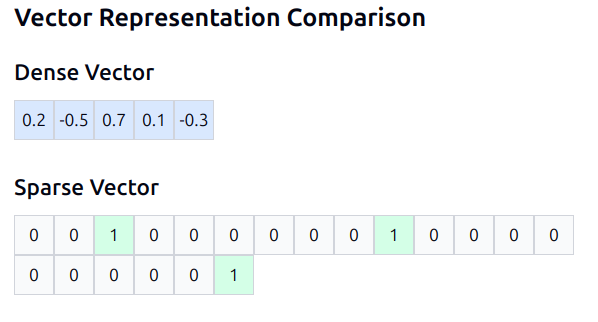

In [33]:
train_embeddings.shape , test_embeddings.shape

((8530, 768), (1066, 768))

In [31]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression on our train embeddings
clf = LogisticRegression(random_state=42)
clf.fit(train_embeddings, data["train"]["label"])

LogisticRegression(random_state=42)

In [32]:
# Predict previously unseen instances
y_pred = clf.predict(test_embeddings)
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.85      0.86      0.85       533
Positive Review       0.86      0.85      0.85       533

       accuracy                           0.85      1066
      macro avg       0.85      0.85      0.85      1066
   weighted avg       0.85      0.85      0.85      1066



**Tip!**  

What would happen if we would not use a classifier at all? Instead, we can average the embeddings per class and apply cosine similarity to predict which classes match the documents best:

In [34]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
# Average the embeddings of all documents in each target label
df = pd.DataFrame(np.hstack([train_embeddings, np.array(data["train"]["label"]).reshape(-1, 1)]))
averaged_target_embeddings = df.groupby(768).mean().values

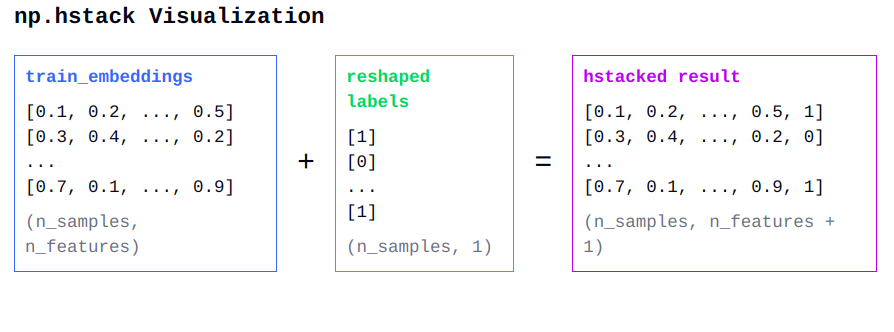

In [36]:
# Find the best matching embeddings between evaluation documents and target embeddings
sim_matrix = cosine_similarity(test_embeddings, averaged_target_embeddings)
y_pred = np.argmax(sim_matrix, axis=1)

In [37]:
# Evaluate the model
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.85      0.84      0.84       533
Positive Review       0.84      0.85      0.84       533

       accuracy                           0.84      1066
      macro avg       0.84      0.84      0.84      1066
   weighted avg       0.84      0.84      0.84      1066



### Zero-shot Classification

In [38]:
# Create embeddings for our labels
label_embeddings = model.encode(["A negative review",  "A positive review"])

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Find the best matching label for each document
sim_matrix = cosine_similarity(test_embeddings, label_embeddings)
y_pred = np.argmax(sim_matrix, axis=1)

In [40]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.78      0.77      0.78       533
Positive Review       0.77      0.79      0.78       533

       accuracy                           0.78      1066
      macro avg       0.78      0.78      0.78      1066
   weighted avg       0.78      0.78      0.78      1066



**Tip!**  

What would happen if you were to use different descriptions? Use **"A very negative movie review"** and **"A very positive movie review"** to see what happens!

In [41]:
# Create embeddings for our labels
label_embeddings = model.encode(["A very negative movie review",  "A very positive movie review"])

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Find the best matching label for each document
sim_matrix = cosine_similarity(test_embeddings, label_embeddings)
y_pred = np.argmax(sim_matrix, axis=1)

In [43]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.86      0.73      0.79       533
Positive Review       0.76      0.88      0.82       533

       accuracy                           0.80      1066
      macro avg       0.81      0.80      0.80      1066
   weighted avg       0.81      0.80      0.80      1066



`NOTE`: due to using the different description the f1_socre increased a bit as compared to previous zero -shot classfication.

## **Classification with Generative Models**

### Encoder-decoder Models

In [44]:
# Load our model
pipe = pipeline(
    "text2text-generation",
    model="google/flan-t5-small",
    device="cuda:0"
)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [45]:
# Prepare our data
prompt = "Is the following sentence positive or negative? "
data = data.map(lambda example: {"t5": prompt + example['text']})
data

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 't5'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label', 't5'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label', 't5'],
        num_rows: 1066
    })
})

In [50]:
print(f"The original text >> \n{data['train'][0]['text']}\nis converted to >>\n{data['train'][0]['t5']}")

The original text >> 
the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .
is converted to >>
Is the following sentence positive or negative? the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .


In [51]:
# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "t5")), total=len(data["test"])): # we are only selecting the t5 features.
    text = output[0]["generated_text"]
    y_pred.append(0 if text == "negative" else 1)
    break

  0%|          | 0/1066 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
  0%|          | 0/1066 [00:00<?, ?it/s]


[{'generated_text': 'positive'}]

In [53]:
output, text, y_pred

([{'generated_text': 'positive'}], 'positive', [1])

In [54]:
# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "t5")), total=len(data["test"])): # we are only selecting the t5 features.
    text = output[0]["generated_text"]
    y_pred.append(0 if text == "negative" else 1)

  0%|          | 0/1066 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 1066/1066 [00:42<00:00, 25.24it/s]


In [55]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.83      0.85      0.84       533
Positive Review       0.85      0.83      0.84       533

       accuracy                           0.84      1066
      macro avg       0.84      0.84      0.84      1066
   weighted avg       0.84      0.84      0.84      1066



### ChatGPT for Classification - can be replaced by free models like llama

In [ ]:
import openai

# Create client
client = openai.OpenAI(api_key="YOUR_KEY_HERE")

In [ ]:
def chatgpt_generation(prompt, document, model="gpt-3.5-turbo-0125"):
    """Generate an output based on a prompt and an input document."""
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
            },
        {
            "role": "user",
            "content":   prompt.replace("[DOCUMENT]", document)
            }
    ]
    chat_completion = client.chat.completions.create(
      messages=messages,
      model=model,
      temperature=0
    )
    return chat_completion.choices[0].message.content

In [ ]:
# Define a prompt template as a base
prompt = """Predict whether the following document is a positive or negative movie review:

[DOCUMENT]

If it is positive return 1 and if it is negative return 0. Do not give any other answers.
"""

# Predict the target using GPT
document = "unpretentious , charming , quirky , original"
chatgpt_generation(prompt, document)

'1'

The next step would be to run one of OpenAI's model against the entire evaluation dataset. However, only run this when you have sufficient tokens as this will call the API for the entire test dataset (1066 records).

In [ ]:
# You can skip this if you want to save your (free) credits
predictions = [chatgpt_generation(prompt, doc) for doc in tqdm(data["test"]["text"])]

100%|██████████| 1066/1066 [13:34<00:00,  1.31it/s]


In [ ]:
# Extract predictions
y_pred = [int(pred) for pred in predictions]

# Evaluate performance
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.87      0.97      0.92       533
Positive Review       0.96      0.86      0.91       533

       accuracy                           0.91      1066
      macro avg       0.92      0.91      0.91      1066
   weighted avg       0.92      0.91      0.91      1066



# External References:

1. [Pipelines for inference](https://huggingface.co/docs/transformers/en/pipeline_tutorial)

2. [SentenceTransformers Documentation](https://sbert.net/)